In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!pip install soundfile librosa scipy

!pip install librosa scipy


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio
import librosa
from scipy.signal import resample


 1Q.Plot the waveform of speech signal (time-domain signal). Display basic information
about the speech file: sample rate, no. of samples, and total duration and active
speech duration (i.e. only where energy is above silence threshold).

Sample Rate: 8000 Hz
Number of Samples: 57344
Total Duration: 7.168 seconds
Active Speech Duration: 6.784 seconds


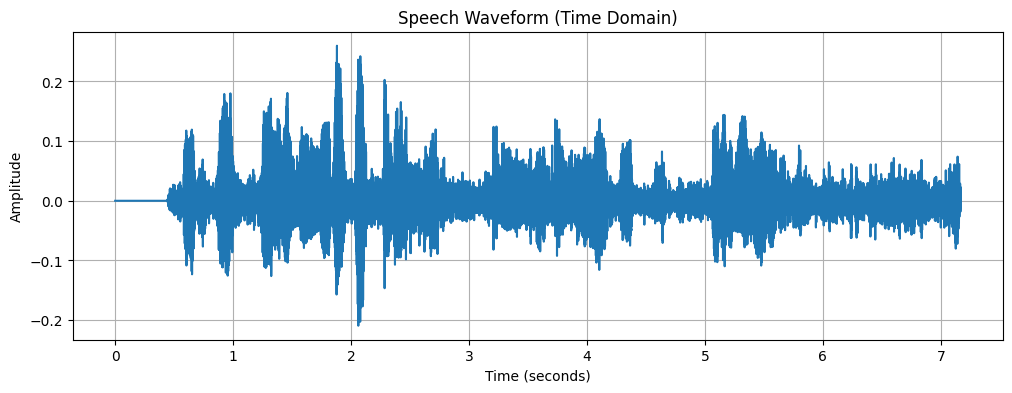

In [9]:


# ---- Load Audio ----
file_path = "/content/drive/MyDrive/audio.wav"  # Change path
signal, sr = librosa.load(file_path, sr=None)

# ---- Basic Information ----
num_samples = len(signal)
total_duration = num_samples / sr

# ---- Active Speech Detection (Energy Based) ----
frame_length = 1024
hop_length = 512

energy = librosa.feature.rms(
    y=signal,
    frame_length=frame_length,
    hop_length=hop_length
)[0]

threshold = 0.01 * np.max(energy)
active_frames = energy > threshold
active_duration = np.sum(active_frames) * hop_length / sr

# ---- Print Information ----
print("Sample Rate:", sr, "Hz")
print("Number of Samples:", num_samples)
print("Total Duration:", total_duration, "seconds")
print("Active Speech Duration:", active_duration, "seconds")

# ---- Plot Waveform ----
time = np.arange(num_samples) / sr

plt.figure(figsize=(12,4))
plt.plot(time, signal)
plt.title("Speech Waveform (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


3. Perform basic signal operations:
i. Slicing (extract first 2 sec.) and normalization. Plot each sliced signal and the
normalized signal.

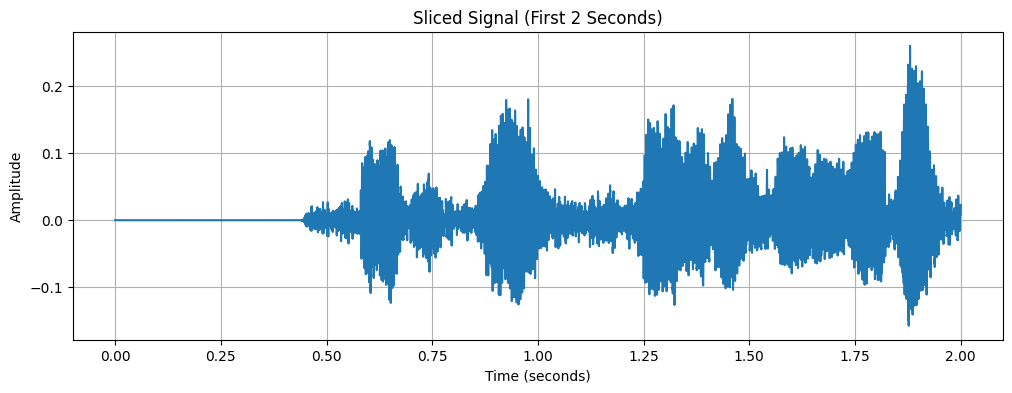

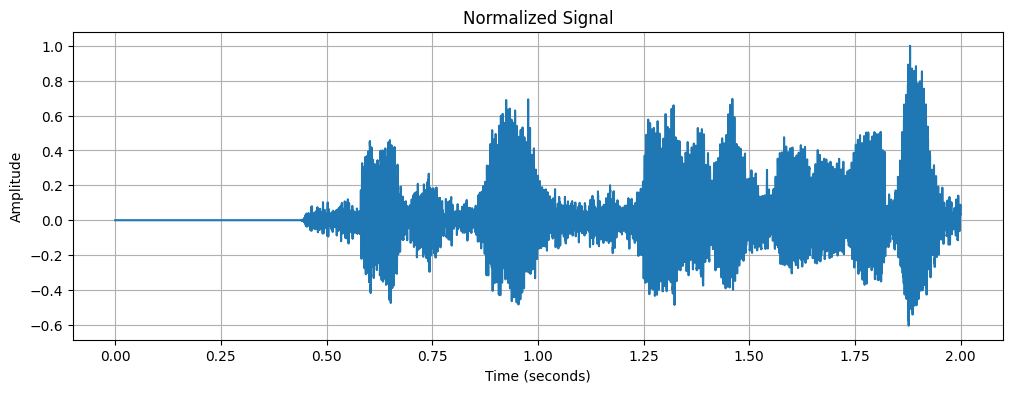

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Slicing First 2 Seconds ----
slice_signal = signal[:int(2 * sr)]
time_slice = np.arange(len(slice_signal)) / sr

plt.figure(figsize=(12,4))
plt.plot(time_slice, slice_signal)
plt.title("Sliced Signal (First 2 Seconds)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# ---- Normalization ----
normalized_signal = slice_signal / np.max(np.abs(slice_signal))

plt.figure(figsize=(12,4))
plt.plot(time_slice, normalized_signal)
plt.title("Normalized Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


ii. Amplification, de-amplification, Up-sampling and Down-sampling the audio
signal. Plot the waveform for each.

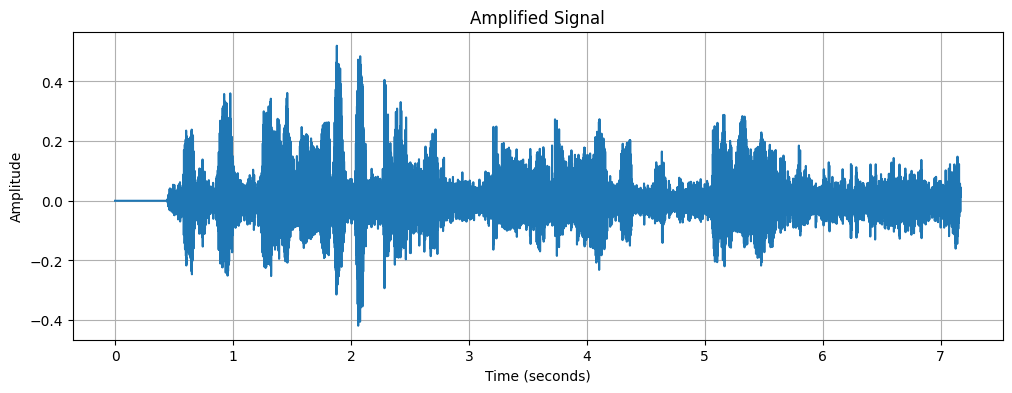

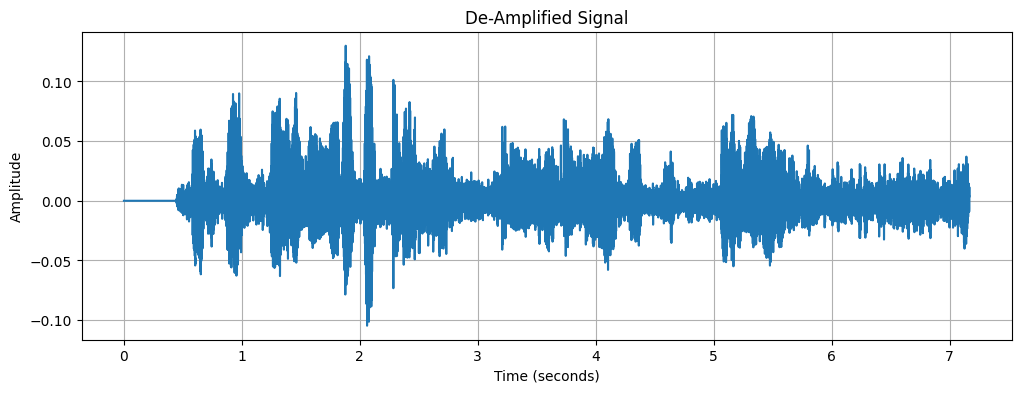

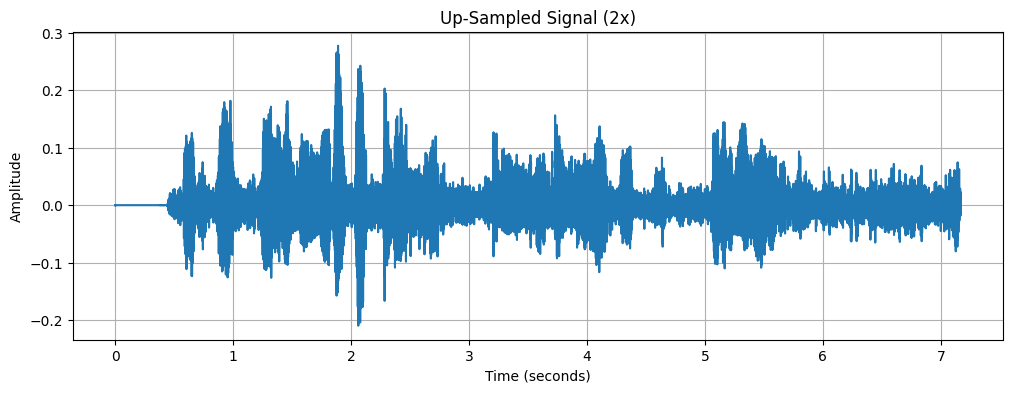

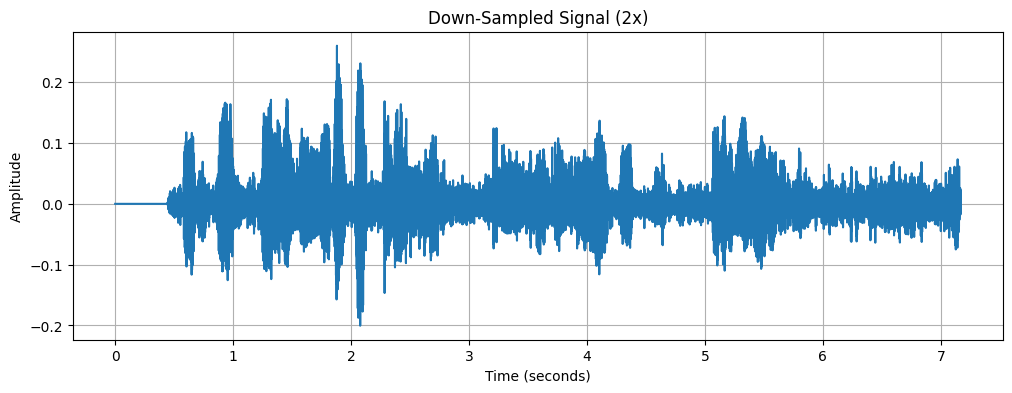

In [11]:
from scipy.signal import resample

time = np.arange(len(signal)) / sr

# ---- Amplification ----
amplified = signal * 2

plt.figure(figsize=(12,4))
plt.plot(time, amplified)
plt.title("Amplified Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# ---- De-Amplification ----
de_amplified = signal * 0.5

plt.figure(figsize=(12,4))
plt.plot(time, de_amplified)
plt.title("De-Amplified Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# ---- Up-Sampling (2x) ----
upsampled = resample(signal, len(signal) * 2)
time_up = np.arange(len(upsampled)) / (sr * 2)

plt.figure(figsize=(12,4))
plt.plot(time_up, upsampled)
plt.title("Up-Sampled Signal (2x)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# ---- Down-Sampling (2x) ----
downsampled = signal[::2]
time_down = np.arange(len(downsampled)) / (sr / 2)

plt.figure(figsize=(12,4))
plt.plot(time_down, downsampled)
plt.title("Down-Sampled Signal (2x)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


iii. Identify voiced/unvoiced/silence portions visually.

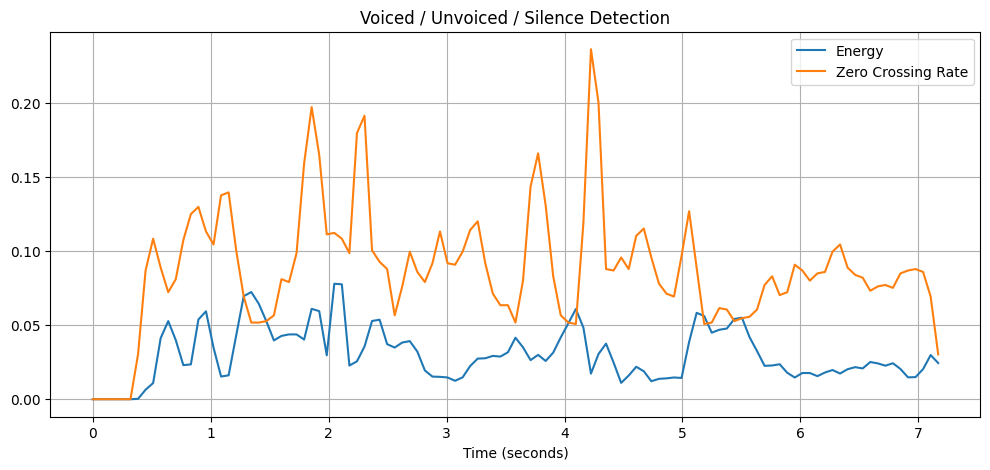

Interpretation:
Voiced → High Energy + Low ZCR
Unvoiced → Lower Energy + High ZCR
Silence → Very Low Energy


In [12]:
import librosa

frame_length = 1024
hop_length = 512

energy = librosa.feature.rms(y=signal,
                             frame_length=frame_length,
                             hop_length=hop_length)[0]

zcr = librosa.feature.zero_crossing_rate(signal,
                                         frame_length=frame_length,
                                         hop_length=hop_length)[0]

frames = np.arange(len(energy))
time_frames = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

plt.figure(figsize=(12,5))
plt.plot(time_frames, energy, label="Energy")
plt.plot(time_frames, zcr, label="Zero Crossing Rate")
plt.title("Voiced / Unvoiced / Silence Detection")
plt.xlabel("Time (seconds)")
plt.legend()
plt.grid()
plt.show()

print("Interpretation:")
print("Voiced → High Energy + Low ZCR")
print("Unvoiced → Lower Energy + High ZCR")
print("Silence → Very Low Energy")
